In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as ols

/home/henny_mac/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
boston = pd.read_csv('boston.csv', index_col = 0)

In [3]:
print(boston.columns)
boston.head()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


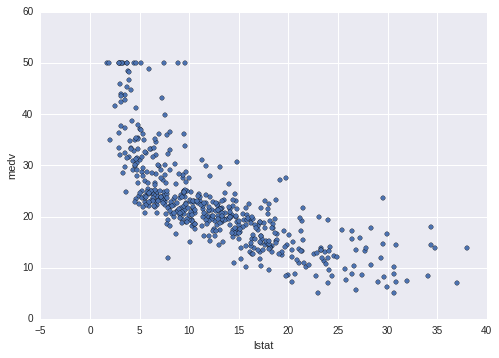

In [4]:
boston.plot.scatter('lstat','medv')
plt.show()

In [5]:
#using statsmodels
fit1 = sm.OLS(boston.medv,sm.add_constant(boston.lstat))
results1 = fit1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 03 Mar 2016   Prob (F-statistic):           5.08e-88
Time:                        11:20:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [6]:
# sklearn needs numpy arrays, not pandas series hence the .values call
# see http://stackoverflow.com/questions/17682613/how-to-convert-a-pandas-dataframe-subset-of-columns-and-rows-into-a-numpy-array
# additionaly, the numpy array needs an axis to add the constants, hence the np.newaxis
# see http://stackoverflow.com/questions/27107057/sklearn-linear-regression-python
skl_fit1 = ols()
skl_fit1.fit(boston.lstat.values[:,np.newaxis],boston.medv.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# I think sklearn models are more focused on accuracy metrics than statistical metrics
print(skl_fit1.intercept_, skl_fit1.coef_)
skl_fit1.score(boston.lstat.values[:,np.newaxis],boston.medv.values)

34.5538408794 [-0.95004935]


0.5441462975864797

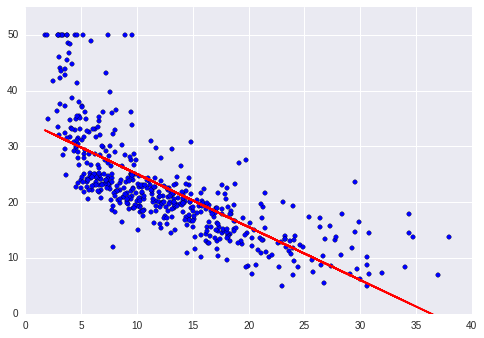

In [8]:
plt.scatter(boston.lstat, boston.medv)
plt.plot(boston.lstat, skl_fit1.predict(boston.lstat.values[:,np.newaxis]), color='red')
plt.xlim([0,40]) #setting limit of x axis
plt.ylim([0,55]) #settin limit of y axis
plt.show()

In [9]:
# i don't think sklearn does confidence intervals, but please correct me if I'm wrong
# but statsmodels does
results1.conf_int(0.05) # 95% confidence interval

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


In [10]:
newLstat = np.array([5,10,15])

In [11]:
#sklearn prediction
skl_fit1.predict(newLstat[:,np.newaxis])

array([ 29.80359411,  25.05334734,  20.30310057])

In [12]:
fit2 = sm.OLS(boston.medv,sm.add_constant(boston[['lstat','age']]))
results2 = fit2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 03 Mar 2016   Prob (F-statistic):           2.98e-88
Time:                        11:20:59   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [13]:
#fit3 = smf.ols(formula='Price ~ AGST + HarvestRain + WinterRain + Age',data=wine)
features = [col for col in boston.columns if col != 'medv']   # every column but response column
fit3 = sm.OLS(boston.medv,sm.add_constant(boston[features]))
results3 = fit3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 03 Mar 2016   Prob (F-statistic):          6.72e-135
Time:                        11:21:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [14]:
def plotFit(fit):
    """Create's the 2x2 panel of plots that plot(fit) would create in R"""
    resid = fit.resid
    mu = resid.mean()
    std = resid.std(axis=0)

    #had to write my own normalize function
    def _normalize(resid):
        return (resid-mu)/std
    norm_resid = resid.apply(_normalize)


    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

    ax1.scatter(fit.fittedvalues, fit.resid)
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Fitted')


    sm.qqplot(fit.resid, ax=ax2)
    ax2.set_title('QQ plot')

    ax3.scatter(fit.fittedvalues, norm_resid)
    ax3.set_xlabel('Fitted Values')
    ax3.set_ylabel('Standardized Residuals')
    ax3.set_title('Scale-Location')

    sm.graphics.influence_plot(fit, ax=ax4, criterion="cooks")

    plt.show()

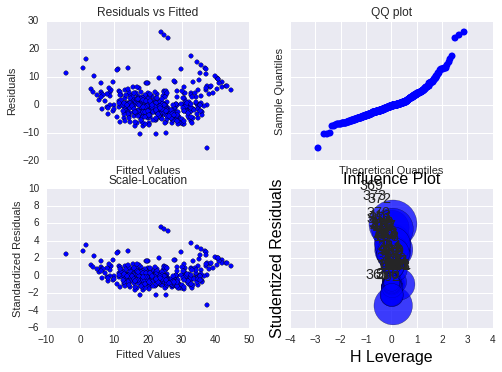

In [18]:
plotFit(results3)

In [16]:

mu = blah.mean()
std = blah.std(axis=0)
print(mu,std)

NameError: name 'blah' is not defined

In [145]:
def _normalize(resid):
    return (resid-mu)/std
blah.apply(_normalize)

1     -1.281826
2     -0.731361
3      0.882272
4      1.023302
5      1.762765
6      0.735236
7     -0.021736
8      1.614923
9      1.062458
10    -0.004326
11    -0.853896
12    -0.573633
13     0.169408
14     0.180856
15    -0.231324
16     0.128638
17     0.549229
18     0.125666
19     0.858698
20    -0.044010
21     0.229757
22     0.411835
23    -0.135121
24     0.148109
25    -0.016725
26     0.109593
27     0.242542
28     0.019541
29    -0.244965
30     0.026383
         ...   
477   -0.818737
478    0.097628
479   -0.983164
480   -0.098800
481   -0.100087
482   -0.725662
483   -0.762186
484    0.152869
485    0.244424
486   -0.218253
487   -0.118689
488   -0.154865
489    0.713982
490   -0.261297
491    0.947091
492   -0.033965
493    0.890045
494    0.250518
495    0.829986
496    1.326818
497    1.214135
498   -0.172624
499   -0.020934
500   -0.203891
501   -0.783272
502   -0.241969
503   -0.379118
504   -0.795809
505   -0.881324
506   -2.229848
dtype: float64

In [141]:
blah.apply(np.log)

1           NaN
2           NaN
3      1.418859
4      1.567149
5      2.110998
6      1.236551
7           NaN
8      2.023402
9      1.604699
10          NaN
11          NaN
12          NaN
13    -0.231329
14    -0.165940
15          NaN
16    -0.506640
17     0.944874
18    -0.530011
19     1.391777
20          NaN
21     0.073383
22     0.656983
23          NaN
24    -0.365695
25          NaN
26    -0.666867
27     0.127534
28    -2.391135
29          NaN
30    -2.090933
         ...   
477         NaN
478   -0.782476
479         NaN
480         NaN
481         NaN
482         NaN
483         NaN
484   -0.334058
485    0.135263
486         NaN
487         NaN
488         NaN
489    1.207216
490         NaN
491    1.489754
492         NaN
493    1.427632
494    0.159888
495    1.357768
496    1.826898
497    1.738146
498         NaN
499         NaN
500         NaN
501         NaN
502         NaN
503         NaN
504         NaN
505         NaN
506         NaN
dtype: float64

In [132]:
z = (blah.values-blah.mean)/blah.std(axis=0)

TypeError: unsupported operand type(s) for -: 'float' and 'method'

In [136]:
dir(blah)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',

In [137]:
help(blah.apply)

Help on method apply in module pandas.core.series:

apply(func, convert_dtype=True, args=(), **kwds) method of pandas.core.series.Series instance
    Invoke function on values of Series. Can be ufunc (a NumPy function
    that applies to the entire Series) or a Python function that only works
    on single values
    
    Parameters
    ----------
    func : function
    convert_dtype : boolean, default True
        Try to find better dtype for elementwise function results. If
        False, leave as dtype=object
    args : tuple
        Positional arguments to pass to function in addition to the value
    Additional keyword arguments will be passed as keywords to the function
    
    Returns
    -------
    y : Series or DataFrame if func returns a Series
    
    See also
    --------
    Series.map: For element-wise operations
    
    Examples
    --------
    
    Create a series with typical summer temperatures for each city.
    
    >>> import pandas as pd
    >>> import numpy